In [392]:
import PySimpleGUI as sg
import pandas as pd
import os 
import sys
import xlwings as xw
import pandas as pd
import matplotlib
import seaborn as sns
import numpy as np
from docxtpl import DocxTemplate, InlineImage
from docx.shared import Cm, Inches, Mm, Emu
from pathlib import Path
from datetime import date, datetime, timedelta
from matplotlib import pyplot as plt
from matplotlib import dates as date_plot
from datetime import datetime
from time import strptime


In [393]:

layout = [
    [sg.Text('Please fill out the following fields:')],
    [sg.Input(key='Start Date', size=(15,1)), sg.CalendarButton('Start Date', close_when_date_chosen=True, target='Start Date', location=[555,455], no_titlebar=False , format='%Y-%m-%d')],
    [sg.Input(key='End Date', size=(15,1)), sg.CalendarButton('End Date', close_when_date_chosen=True, target='End Date', location=[555,455], no_titlebar=False, format='%Y-%m-%d' )],
    [sg.Submit(), sg.Exit()]
]

window = sg.Window('Simple data entry form', layout)

while True:
    event, values = window.read()
    if event == sg.WIN_CLOSED or event == 'Exit':
        break
    if event == 'Submit':
        Start = values['Start Date']
        End = values['End Date']
        Start = pd.to_datetime(Start, infer_datetime_format=True)
        Start = Start.strftime('%b %Y')
        End = pd.to_datetime(End, infer_datetime_format=True)
        End = End.strftime('%b %Y')
        sg.popup('Stand by for file Sir')
        break
window.close()


In [394]:

os.chdir(sys.path[0])
current_dir = Path(__file__).parent if "__file__" in locals() else Path.cwd()
output_file = current_dir / "Datix.xlsx"
output_file

d_parser = lambda x: datetime.strptime(x, '%d/%m/%Y')
df = pd.read_csv('DatixWebReport.csv', parse_dates=['Date Received', 'Incident date'], date_parser=d_parser)


In [395]:

df.set_index('Incident date', inplace=True)
#datetime.strptime(df.index,'%B %Y')

df_1 = pd.get_dummies(df['Category'])
df_1 = df_1['2021-01-01': End].resample('MS').sum()


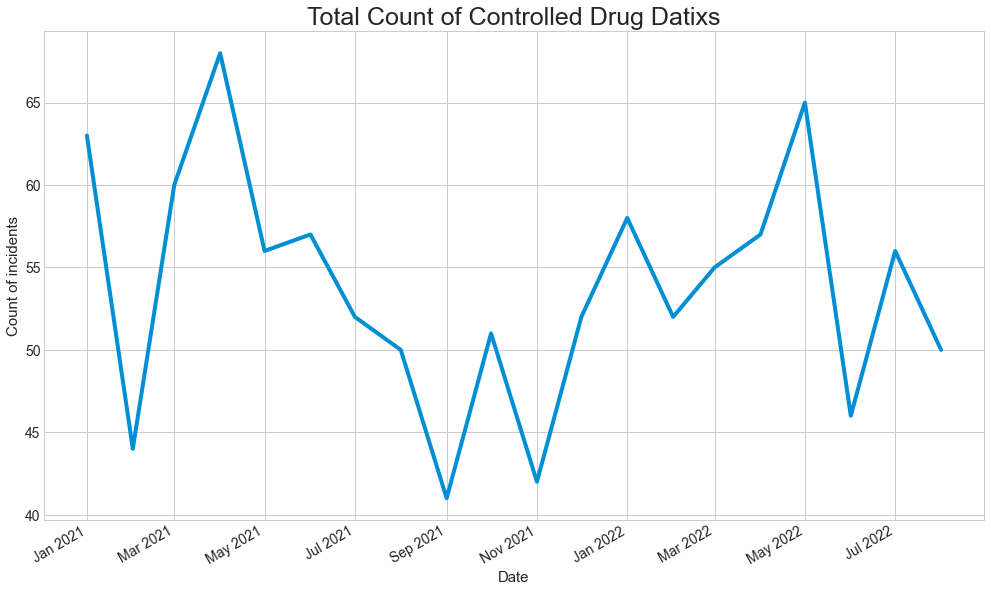

In [396]:
#total count of datixs
#Size of graph
plt.figure(figsize=(15,10))
#Style of graph
plt.style.use(['seaborn-whitegrid'])
#Title
plt.title('Total Count of Controlled Drug Datixs',fontsize=35)
#Labels for the axis
plt.xlabel('Date', fontsize=15)
plt.ylabel('Count of incidents', fontsize=15)
plt.plot(df_1['Controlled Drugs'])

#Setting the date format
plt.gcf().autofmt_xdate()
date_format = date_plot.DateFormatter('%b %Y')
plt.gca().xaxis.set_major_formatter(date_format)
plt.savefig(f"Total Count of Controlled Drug Datixs.png", bbox_inches='tight')


In [397]:

List1=['morphine', 'Morphine', 'Midazolam', 'midazolam', 'Ketamine', 'ketamine', 'diazepam', 'diazemuls', 'Diazepam']
CDamount = {}
for word in List1:
    CDamount[word] = df['Description'].str.contains(word).sum()
CDamount = pd.DataFrame(data=CDamount, index=['Count'])

CDamount = CDamount.transpose()


In [398]:

Ad=df_1['Administration or Supply of a Medicine']
Am=df_1['Ampoule Breakage in Pouch']
cd=df_1['Controlled Drugs']
Ip=df_1['Incorrect Paperwork / Tagging']
Ma=df_1['Medication Advice (by EOC or Crew)']
Med=df_1['Medicines Management']
Ps=df_1['Pouches Left at Scene']



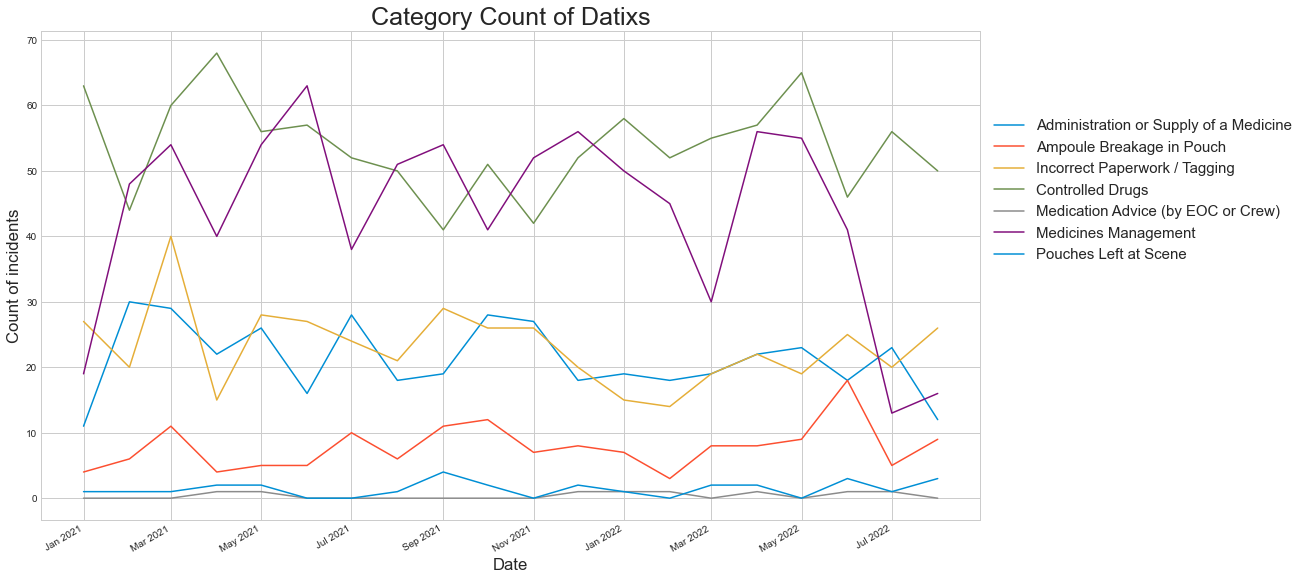

In [399]:

#Size of graph
plt.figure(figsize=(15,10))
#Style of graph
plt.style.use(['seaborn-whitegrid'])
#Title
plt.title('Category Count of Datixs',fontsize=25)
#Labels for the axis
plt.xlabel('Date')
plt.ylabel('Count of incidents')
#Size of axis font
plt.tick_params(axis='both', labelsize=10)
#plotting the graph
plt.plot(Ad, label='Administration or Supply of a Medicine', linewidth=1.5)
plt.plot(Am, label='Ampoule Breakage in Pouch ', linewidth=1.5)
plt.plot(Ip, label='Incorrect Paperwork / Tagging ', linewidth=1.5)
plt.plot(cd, label='Controlled Drugs ', linewidth=1.5)
plt.plot(Ma, label='Medication Advice (by EOC or Crew) ', linewidth=1.5)
plt.plot(Med, label='Medicines Management ', linewidth=1.5)
plt.plot(Ps, label='Pouches Left at Scene ', linewidth=1.5)
#legend format bbox anchor will put it to a specific place, facecolour will set the background colour 
plt.legend(loc='lower left', bbox_to_anchor=(1, 0.5),facecolor='none', fontsize=15, edgecolor='black')
#Setting the date format
plt.gcf().autofmt_xdate()
date_format = date_plot.DateFormatter('%b %Y')
plt.gca().xaxis.set_major_formatter(date_format)
plt.savefig(f"Category Count of Datixs.png", bbox_inches='tight')


In [400]:

#Getting the subcategory of CDs
CDyes = ['Controlled Drugs']
CDfilt = df['Category'].isin(CDyes)
CDsc = df.loc[CDfilt, ['Sub category']]
CDscd = pd.get_dummies(CDsc['Sub category'])
CDscd = CDscd['2021-01-01': End].resample('MS').sum()
CDscd


,Accidental Spillage / Wastage of Drug,Broken Controlled Drug,Codes Shared Inappropriately and Not in Accordance With SOP's,Controlled Drug Taken Home in Error,Drugs Bag Left at Scene,"Expiry Date Wrong, Omitted or Passed",Inappropriate Single Signature For Controlled Drugs,Incorrect Disposal of Drug,Medicine Keys,Missing But Not Perceived Stolen,Non Compliance to SOP's,Omnicell - Emergency Barcode Used,Omnicell Error,Theft of Controlled Drug
Incident date,,,,,,,,,,,,,,
2021-01-01,3,23,0,21,1,0,1,2,1,5,3,0,3,0
2021-02-01,3,15,0,11,0,1,1,3,0,5,2,0,3,0
2021-03-01,7,27,0,9,1,0,2,3,0,7,1,0,2,1
2021-04-01,6,15,0,12,0,0,0,4,0,16,12,0,3,0
2021-05-01,8,16,0,11,0,1,2,3,0,4,7,0,4,0
2021-06-01,11,22,0,13,0,0,0,1,0,5,1,0,4,0
2021-07-01,7,8,0,7,0,0,4,3,0,13,5,0,5,0
2021-08-01,5,15,0,12,0,1,1,3,1,4,6,0,2,0
2021-09-01,5,9,0,10,0,0,0,5,0,5,7,0,0,0


In [401]:

#Filtering the obove out
As1=CDscd['Accidental Spillage / Wastage of Drug']
Bcd=CDscd['Broken Controlled Drug']
Code=CDscd["Codes Shared Inappropriately and Not in Accordance With SOP's"]
CDhome=CDscd['Controlled Drug Taken Home in Error']
CDbag=CDscd['Drugs Bag Left at Scene']
Inap=CDscd['Inappropriate Single Signature For Controlled Drugs']
Disposal=CDscd['Incorrect Disposal of Drug']
Keys=CDscd['Medicine Keys']
Missing=CDscd['Missing But Not Perceived Stolen']
Noncom=CDscd["Non Compliance to SOP's"]
Bar=CDscd['Omnicell - Emergency Barcode Used']
Omnicellerr=CDscd['Omnicell Error']
Theft=CDscd['Theft of Controlled Drug']


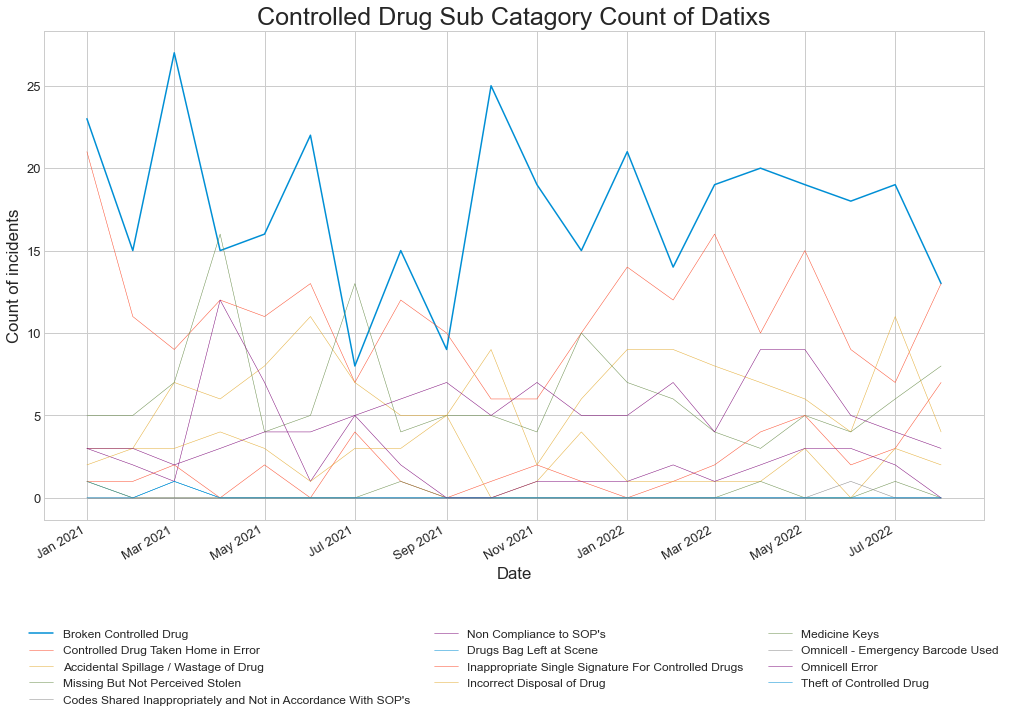

In [402]:

#CD subcategory
#Size of graph
plt.figure(figsize=(15,10))
#Style of graph
plt.style.use(['seaborn-whitegrid'])
#Title
plt.title('Controlled Drug Sub Catagory Count of Datixs',fontsize=25)
#Labels for the axis
plt.xlabel('Date')
plt.ylabel('Count of incidents')
#Size of axis font
plt.tick_params(axis='both', labelsize=13)
#plotting the graph
plt.plot(Bcd, label='Broken Controlled Drug', linewidth=1.5)
plt.plot(CDhome, label='Controlled Drug Taken Home in Error', linewidth=0.5)
plt.plot(As1, label='Accidental Spillage / Wastage of Drug', linewidth=0.5)
plt.plot(Missing, label='Missing But Not Perceived Stolen', linewidth=0.5)
plt.plot(Code, label="Codes Shared Inappropriately and Not in Accordance With SOP's", linewidth=0.5)
plt.plot(Noncom, label="Non Compliance to SOP's", linewidth=0.5)
plt.plot(CDbag, label='Drugs Bag Left at Scene', linewidth=0.5)
plt.plot(Inap, label='Inappropriate Single Signature For Controlled Drugs', linewidth=0.5)
plt.plot(Disposal, label='Incorrect Disposal of Drug', linewidth=0.5)
plt.plot(Keys, label='Medicine Keys', linewidth=0.5)
plt.plot(Bar, label='Omnicell - Emergency Barcode Used', linewidth=0.5)
plt.plot(Omnicellerr, label='Omnicell Error', linewidth=0.5)
plt.plot(Theft, label='Theft of Controlled Drug', linewidth=0.5)
#legend format bbox anchor will put it to a specific place, facecolour will set the background colour 
plt.legend(loc='center', bbox_to_anchor=(0.5, -0.3),facecolor='none', fontsize=12, edgecolor='black', ncol=3)
#Setting the date format
plt.gcf().autofmt_xdate()
date_format = date_plot.DateFormatter('%b %Y')
plt.gca().xaxis.set_major_formatter(date_format)
plt.savefig(f"Controlled Drug Sub Catagory Count of Datix.png", bbox_inches='tight')




In [403]:

#getting subcategory in the category
sub = df.groupby(['Category', 'Sub category']).size()

#Gets all the harm and SI
harmyes = ['Low (Minimal harm - injured party required extra observation or minor treatment)','Moderate (Short term harm - injured party required further treatment or procedure)','Severe (Injured party sustained permanent or long term harm)']
harmfilt = df['Grade of harm'].isin(harmyes)
harmdf = df.loc[harmfilt, ['Ref', 'Description', 'Date Received', 'Category', 'Sub category', 'Action taken', 'Action taken (Investigation)', 'Investigation Level', 'Lessons learned']]
harmdf = harmdf[Start:End]
SIlist = ['Level 1 - No/Low Harm Investigation','Level 3 - Internal Route Cause Analysis','Level 4 - Serious Incident','Level 2 - Moderate with Duty of Candour']
SIfilt = df['Investigation Level'].isin(SIlist)
SIlevel = df.loc[SIfilt, ['Ref', 'Description', 'Date Received', 'Category', 'Sub category', 'Action taken', 'Action taken (Investigation)', 'Investigation Level', 'Lessons learned']]
SIlevel = SIlevel[Start:End]


In [404]:

#harm categories
harmbari = pd.get_dummies(harmdf['Category']).sum()

harmbar = pd.DataFrame(harmbari)



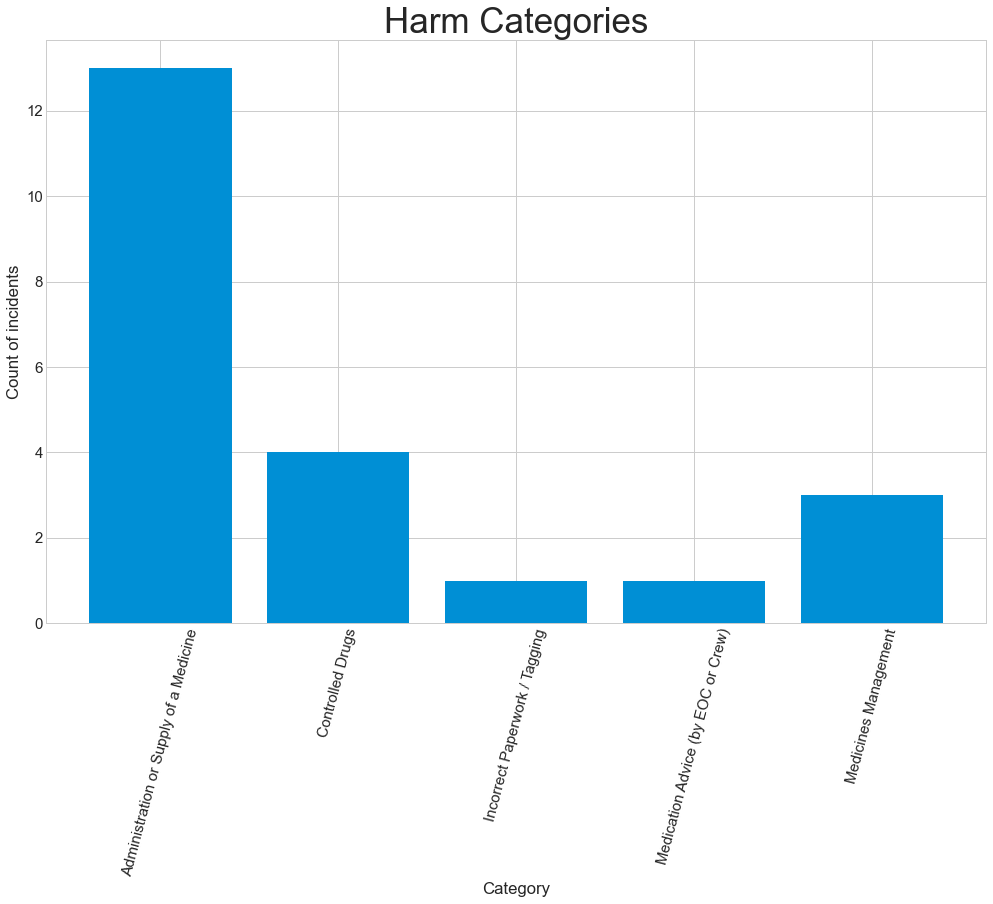

In [416]:

plt.figure(figsize=(15,10))
plt.bar(harmbar.index, harmbar[0])

plt.xlabel('Category')
plt.ylabel('Count of incidents')
plt.title('Harm Categories', fontsize=35)
plt.xticks(rotation=75)

plt.tick_params(axis='both', labelsize=15, width=0.5)
plt.savefig(f"Harmbarchart.png", bbox_inches='tight')



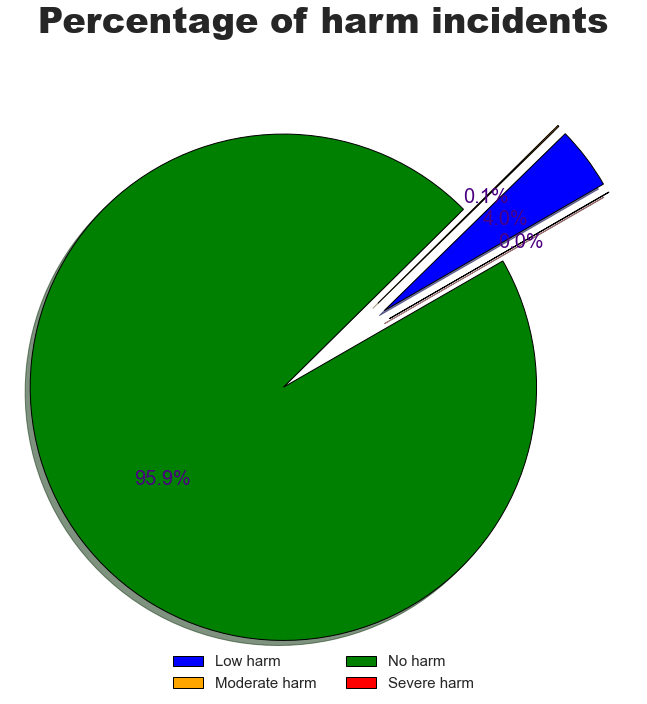

In [406]:
labels = ['Low harm','Moderate harm', 'No harm', 'Severe harm']

plt.figure(figsize=(15,10))

#pie chart for Harm
df_h = pd.get_dummies(df['Grade of harm'])
df_h = df_h.sum()
labelsdf = pd.DataFrame(df_h)
colour_list=['blue', 'orange', 'green', 'red']
plt.pie(df_h, shadow=True, autopct='%1.1f%%',textprops={'fontsize': 20, 'color':"indigo"}, labels=None, colors=colour_list, explode=[0.3,0.3,0.2,0.3], wedgeprops={"edgecolor":"k",'linewidth': 1}, startangle=30)
plt.legend(labels=labels, bbox_to_anchor=(0.5,0), loc="center", fontsize=15, ncol=2)
plt.title('Percentage of harm incidents', fontsize=35, weight='heavy')

plt.tight_layout()
plt.savefig(f"Harmpiechart.png", bbox_inches='tight')


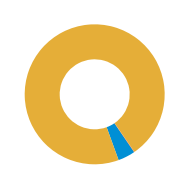

In [407]:

fig, ax = plt.subplots(figsize=(6, 3), subplot_kw=dict(aspect="equal"))


def func(pct, allvals):
    absolute = int(np.round(pct/100.*np.sum(allvals)))
    return "{:.1f}%\n({:d} g)".format(pct, absolute)


wedges, texts = ax.pie(df_h, wedgeprops=dict(width=0.5), startangle=-70)
bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")




In [408]:

#This is to find all items with the List in the descriptions

List1=['orphine', 'idazolam', 'etamine', 'iazemuls', 'iazepam', 'odeine']
dfcdfilt = df[Start:End]

CDoutput = {}
for word in List1:
    CDoutput[word] = dfcdfilt['Description'].str.contains(word).sum()
print(CDoutput)
CDoutput = pd.DataFrame(data=CDoutput, index=['Count'])
CDoutput = CDoutput.transpose()

CDoutput['Index'] = '1','2','3','4','5', '6'
CDoutput.set_index('Index', inplace=True)
CDoutput['Drug'] = 'Morphine', 'Midazolam', 'Ketamine', 'Diazemuls', 'Diazepam', 'Codeine'


{'orphine': 103, 'idazolam': 11, 'etamine': 3, 'iazemuls': 1, 'iazepam': 30, 'odeine': 2}


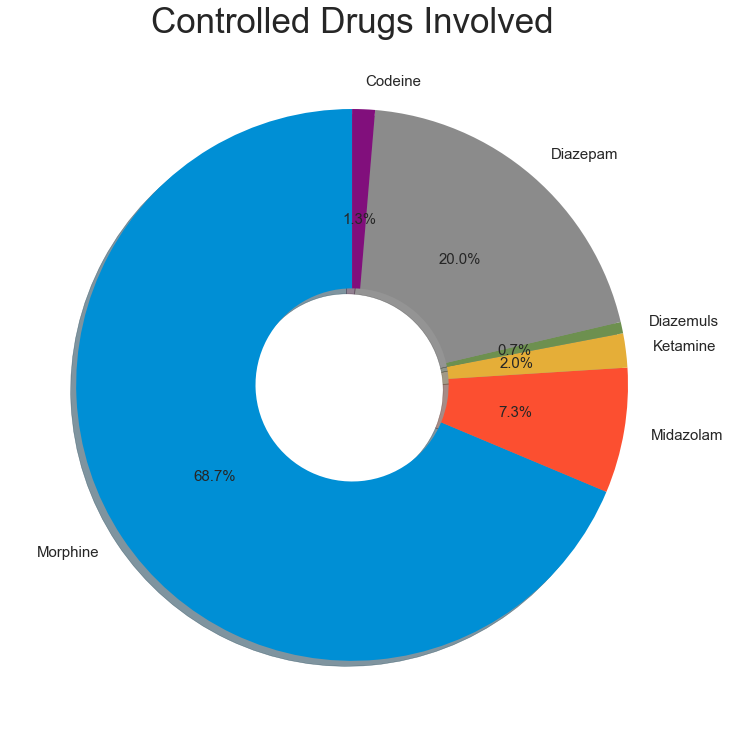

In [417]:

#This is to make the pie chart and save it
import matplotlib.pyplot as plt


plt.figure(figsize=(15,10))
plt.pie(CDoutput['Count'], labels=CDoutput['Drug'], shadow=True, autopct='%1.1f%%', wedgeprops=dict(width=0.65), textprops={'fontsize': 15}, startangle=90, labeldistance=1.1)
plt.style.use('fivethirtyeight')
plt.tight_layout()
plt.title('Controlled Drugs Involved', fontsize=35)
plt.savefig(f"Controlled Drug datix.png", bbox_inches='tight')


In [410]:

#This writes it to the file
with pd.ExcelWriter(output_file, engine="xlsxwriter") as writer:
    
    df.to_excel(writer, sheet_name="Raw Data", index=False)
    harmdf.to_excel(writer, sheet_name="Harm")
    SIlevel.to_excel(writer, sheet_name="SI")


In [411]:

df_sc = pd.get_dummies(df['Sub category'])
medna = df_sc['Medicine not Available for Patient']
oxy = df_sc['Medical Gases (O2)']
oxy2 = df_sc['Medical Gases (Entonox)']
oxy3 = df_sc['Medical Gases O2 Left / Found in Insecure Location']
oxyt = oxy+oxy2+oxy3
oxyt
Temp = df_sc['Temperature Control Issues']
dft = df['ID']
doc = DocxTemplate('Datix report template.docx')


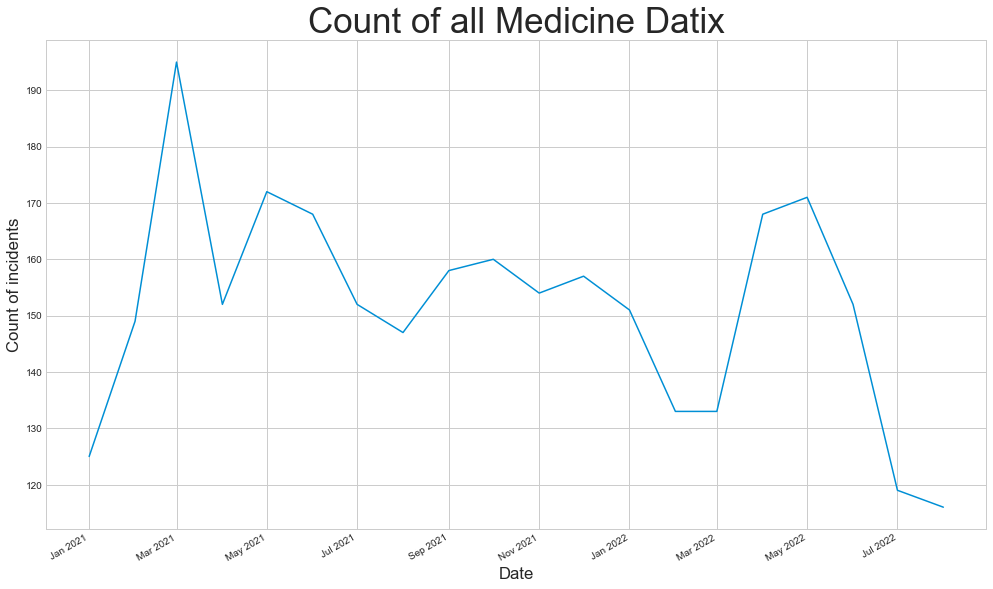

In [418]:

#Graph of all incidents
#Size of graph

#Style of graph
plt.style.use(['seaborn-whitegrid'])

plt.figure(figsize=(15,10))
#Title
plt.title('Count of all Medicine Datix',fontsize=35)
#Labels for the axis
plt.xlabel('Date')
plt.ylabel('Count of incidents')
#Size of axis font
plt.tick_params(axis='both', labelsize=10)
#plotting the graph
plt.plot(df['2021-01-01':End].resample('MS').size(), linewidth=1.5)
#legend format bbox anchor will put it to a specific place, facecolour will set the background colour 
#plt.legend(loc='lower left', bbox_to_anchor=(1, 0.5),facecolor='none', fontsize=8, edgecolor='black')
#Setting the date format
plt.gcf().autofmt_xdate()
date_format = date_plot.DateFormatter('%b %Y')
plt.gca().xaxis.set_major_formatter(date_format)

plt.savefig(f"Count of all Medicine Datix.png", bbox_inches='tight')



In [413]:

context = {
    #'Catagorygraph':InlineImage(doc, 'Category Count of Datixs.png'), 
   # 'Allincidentsgraph':InlineImage(doc, 'Count of all Medicine Datix.png'),
  #  'Harmcatagoriesbargraph':InlineImage(doc, 'Harmbarchart.png'),
 #   'Gradeofharmpiegraph':InlineImage(doc, 'Harmpiechart.png'),
#    'Controlleddrugcategorygraph':InlineImage(doc, 'Controlled Drug Sub Catagory Count of Datix.png'),
 #   'CDdrugs':InlineImage(doc, 'Controlled Drug datix.png'),
#    'AllCDgraph':InlineImage(doc, 'Total Count of Controlled Drug Datixs.png'),
    'CD':cd[Start:End].sum(),
    'Admin':Ad[Start:End].sum(),
    'Tot':dft[Start:End].count(),
    'Incor':Ip[Start:End].sum(),
    'Pouche':Ps[Start:End].sum(),
    'MedMan':Med[Start:End].sum(),
    'Ampoule':Am[Start:End].sum(),
    'O2':oxyt[Start:End].sum(),
    'Temp':Temp[Start:End].sum(),
    'NotAva':medna[Start:End].sum(),
    'End':End,
    'Start':Start,
}



In [414]:

def main():    
    #This creates the word document
    doc.replace_pic('Placeholder.png','Category Count of Datixs.png')
    doc.replace_pic('Placeholder_1.png','Count of all Medicine Datix.png')
    doc.replace_pic('Placeholder_2.png','Harmbarchart.png')
    doc.replace_pic('Placeholder_3.png','Controlled Drug Sub Catagory Count of Datix.png')
    doc.replace_pic('Placeholder_4.png','Controlled Drug datix.png')
    doc.replace_pic('Placeholder_5.png','Total Count of Controlled Drug Datixs.png')
    doc.replace_pic('Placeholder_6.png','Harmpiechart.png')
    output_name = f'Datix Report {End}.docx'
    doc.render(context)
    doc.save(output_name)


In [415]:

if __name__ == "__main__":
    xw.Book("Datix.xlsx").set_mock_caller()
    main()


